<a href="https://colab.research.google.com/github/Barcoaie/licenta_app_try2/blob/master/licenta_try2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import os

drive.mount('/content/drive')

!ls drive/MyDrive/LICENTA

os.mkdir('./input')
!unzip drive/MyDrive/LICENTA/input.zip -d ./input

Streaming output truncated to the last 5000 lines.
  inflating: ./input/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (3887).JPG  
  inflating: ./input/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (3888).JPG  
  inflating: ./input/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (3889).JPG  
  inflating: ./input/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (389).JPG  
  inflating: ./input/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (3890).JPG  
  inflating: ./input/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (3891).JPG  
  inflating: ./input/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (3892).JPG  
  inflating: ./input/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (3893).JPG  
  inflating: ./input/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (3894).JPG  
  inflating: ./input/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (3895).JPG  
  inflating: ./input/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (3896).JPG  
  inflating: ./input/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (3897).JPG  
  

In [ ]:
import os

root = "./input"
#print(len(os.listdir(root)))

db_dir = "./db_dir"
os.mkdir(db_dir)

train_dir = os.path.join(db_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(db_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(db_dir, 'test')
os.mkdir(test_dir)

for classes in os.listdir(root):
  os.mkdir(os.path.join(train_dir,classes))
  os.mkdir(os.path.join(validation_dir,classes))
  os.mkdir(os.path.join(test_dir,classes))

In [ ]:
import math
import shutil

i = 1;
for class_ in os.listdir(root):
  print("Batch nr. ", i);
  path_class = os.path.join(root, class_)
  file_names = os.listdir(path_class)
  
  train_size = math.floor(len(file_names) * 0.75)
  validation_size = math.floor(len(file_names) * 0.05)
  test_size = math.floor(len(file_names) * 0.20)

  train_file_names = file_names[:train_size]
  print("Train size of class ",class_,": ",len(train_file_names))
  for file_name in train_file_names:
    src = os.path.join(path_class, file_name)
    dest = os.path.join(os.path.join(train_dir, class_), file_name)
    shutil.copyfile(src, dest)
  
  validation_file_names = file_names[train_size:(validation_size + train_size)]
  print("Validation size of class ",class_,": ",len(validation_file_names))
  for file_name in validation_file_names:
    src = os.path.join(path_class, file_name)
    dest = os.path.join(os.path.join(validation_dir, class_), file_name)
    shutil.copyfile(src, dest)
  
  test_file_names = file_names[(validation_size + train_size):(test_size + validation_size + train_size)]
  print("Test size of class ",class_,": ",len(test_file_names))
  for file_name in test_file_names:
    src = os.path.join(path_class, file_name)
    dest = os.path.join(os.path.join(test_dir, class_), file_name)
    shutil.copyfile(src, dest)
  i+=1;

Batch nr.  1
Train size of class  Corn___Cercospora_leaf_spot Gray_leaf_spot :  384
Validation size of class  Corn___Cercospora_leaf_spot Gray_leaf_spot :  25
Test size of class  Corn___Cercospora_leaf_spot Gray_leaf_spot :  102
Batch nr.  2
Train size of class  Tomato___Late_blight :  1431
Validation size of class  Tomato___Late_blight :  95
Test size of class  Tomato___Late_blight :  381
Batch nr.  3
Train size of class  Tomato___Tomato_Yellow_Leaf_Curl_Virus :  4017
Validation size of class  Tomato___Tomato_Yellow_Leaf_Curl_Virus :  267
Test size of class  Tomato___Tomato_Yellow_Leaf_Curl_Virus :  1071
Batch nr.  4
Train size of class  Tomato___Target_Spot :  1053
Validation size of class  Tomato___Target_Spot :  70
Test size of class  Tomato___Target_Spot :  280
Batch nr.  5
Train size of class  Corn___Common_rust :  894
Validation size of class  Corn___Common_rust :  59
Test size of class  Corn___Common_rust :  238
Batch nr.  6
Train size of class  Tomato___Bacterial_spot :  1595


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_dir = "./db_dir/train"
validation_dir = "./db_dir/validation"

train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_datagenerator = train_datagen.flow_from_directory(train_dir, 
                                                        target_size=(150,150), 
                                                        batch_size=32, 
                                                        class_mode='categorical')
validation_datagenerator = validation_datagen.flow_from_directory(validation_dir, 
                                                                  target_size=(150,150), 
                                                                  batch_size=32, 
                                                                  class_mode='categorical')

Found 22554 images belonging to 17 classes.
Found 1496 images belonging to 17 classes.


In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from keras.models import Sequential
from keras import regularizers

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dropout(0.6))
model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(2e-3)))
model.add(Dense(17, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 256)       2

In [ ]:
from keras.optimizers import Adam

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=1e-3), metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
epochs = model.fit(x=train_datagenerator, epochs=10, verbose=1, validation_data=validation_datagenerator)

Epoch 1/10
705/705 [==============================] - 816s 1s/step - loss: 1.8027 - acc: 0.5232 - val_loss: 0.9357 - val_acc: 0.7948
Epoch 2/10
705/705 [==============================] - 815s 1s/step - loss: 0.7611 - acc: 0.8399 - val_loss: 0.6442 - val_acc: 0.8656
Epoch 3/10
705/705 [==============================] - 812s 1s/step - loss: 0.6364 - acc: 0.8759 - val_loss: 0.5338 - val_acc: 0.9138
Epoch 4/10
705/705 [==============================] - 801s 1s/step - loss: 0.6000 - acc: 0.8898 - val_loss: 0.5176 - val_acc: 0.9184
Epoch 5/10
705/705 [==============================] - 799s 1s/step - loss: 0.5614 - acc: 0.9008 - val_loss: 0.5105 - val_acc: 0.9211
Epoch 6/10
705/705 [==============================] - 795s 1s/step - loss: 0.5348 - acc: 0.9098 - val_loss: 0.4420 - val_acc: 0.9238
Epoch 7/10
705/705 [==============================] - 794s 1s/step - loss: 0.4703 - acc: 0.9252 - val_loss: 0.4439 - val_acc: 0.9439
Epoch 8/10
705/705 [==============================] - 795s 1s/step - 

In [ ]:
model.save("./drive/MyDrive/LICENTA/dbdir/saved_model2_after_10_epochs.h5")

In [ ]:
from keras.models import load_model

model = load_model("./drive/MyDrive/LICENTA/dbdir/saved_model_after_30_epochs.h5")

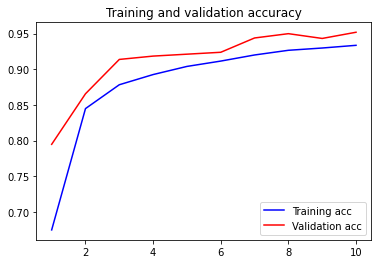

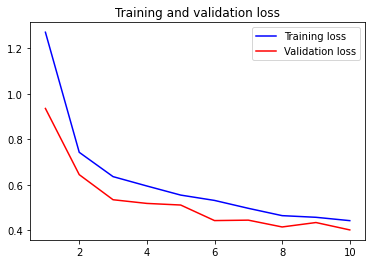

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline

acc = epochs.history['acc']
val_acc = epochs.history['val_acc']
loss = epochs.history['loss']
val_loss = epochs.history['val_loss']

stages = range(1, len(acc) + 1)

plt.plot(stages, acc, 'b', label='Training acc')
plt.plot(stages, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(stages, loss, 'b', label='Training loss')
plt.plot(stages, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

test_dir = "./db_dir/test"

test_datagen = ImageDataGenerator(rescale=1./255)
test_datagenerator = test_datagen.flow_from_directory(test_dir, 
                                                      target_size=(150,150),
                                                      shuffle=False, 
                                                      batch_size=32, 
                                                      class_mode='categorical')

Found 6010 images belonging to 17 classes.


In [ ]:
score = model.evaluate(test_datagenerator, verbose=1)
print(score)

188/188 [==============================] - 84s 414ms/step - loss: 0.1965 - acc: 0.9902
[0.19653616845607758, 0.9901830554008484]


In [ ]:
from keras.preprocessing import image
import numpy as np

img_path = "./db_dir/test/Corn___Common_rust/image (1001).JPG"
#img_path = "./dbdir/test/Background_without_leaves/image (1001).jpg"

img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255

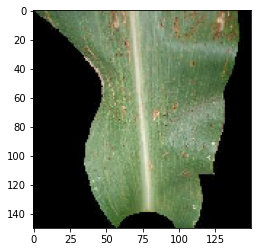

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(img_tensor[0])
plt.show()

In [ ]:
q = model.predict(img_tensor, verbose=1)
print(q)
print(np.argmax(q))

1/1 [==============================] - 0s 24ms/step
[[1.0704515e-12 1.8893104e-14 1.0000000e+00 5.4417587e-13 5.9566380e-18
  7.6895834e-24 1.7075609e-20 2.4926600e-20 2.8869915e-15 1.6744804e-15
  2.6438221e-29 1.0906182e-18 2.1627599e-30 4.3925550e-24 2.0936116e-32
  2.0618477e-37 3.3313810e-25]]
2


In [ ]:
print(list(test_datagenerator.class_indices)[np.argmax(q)])

Corn___Common_rust


In [ ]:
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):

    plt.figure(figsize=(16,16))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))

    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import itertools


class_names = []
for k in test_datagenerator.class_indices:
  class_names.append(k)

print(class_names)

Y_pred = model.predict_generator(test_datagenerator, verbose=1)
y_pred = np.argmax(Y_pred, axis=1)


['Background_without_leaves', 'Corn___Cercospora_leaf_spot Gray_leaf_spot', 'Corn___Common_rust', 'Corn___Northern_Leaf_Blight', 'Corn___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1976: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


188/188 [==============================] - 87s 413ms/step


Confusion matrix
Confusion matrix, without normalization


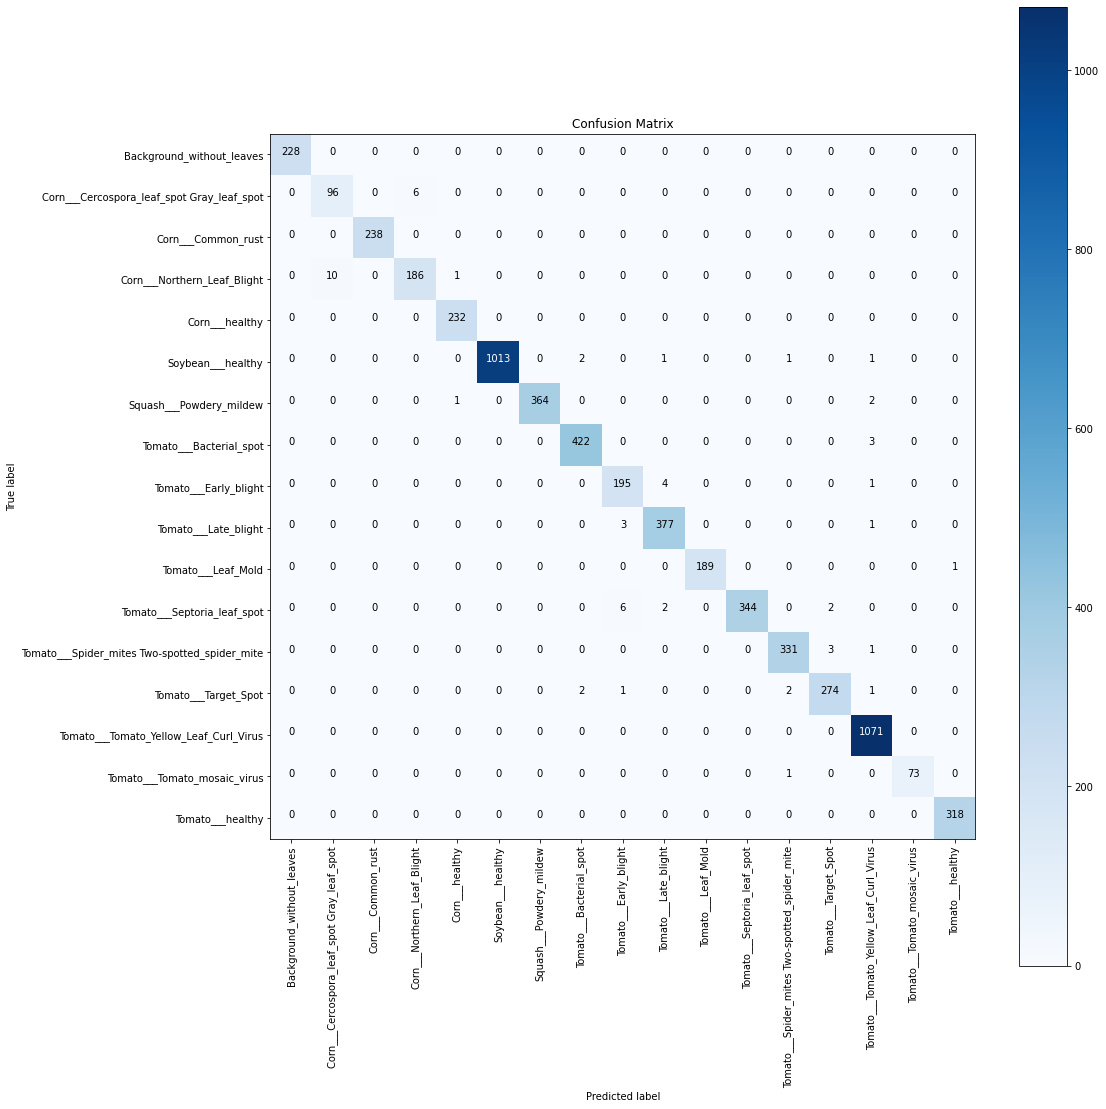

In [ ]:

print("Confusion matrix")
cm = confusion_matrix(test_datagenerator.classes, y_pred)
plot_confusion_matrix(cm, class_names, normalize=False, title='Confusion Matrix')

In [ ]:
!zip -r db_dir.zip db_dir

from google.colab import files
files.download("db_dir.zip")

In [ ]:
import tensorflow as tf

converter = tf.lite.TFLiteConverter.from_keras_model(model)

tflite_model = converter.convert()

open("./drive/MyDrive/LICENTA/saved_model_20.tflite", "wb").write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpzfow780l/assets


INFO:tensorflow:Assets written to: /tmp/tmpzfow780l/assets


14421988